# HW2: Numpy cho Khoa học dữ liệu - Khám phá dữ liệu

## Thông tin về bộ dataset

**Tên của bộ dataset**: HR Analytics: Job Change of Data Scientists 

**Nguồn dataset**: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists  

**Ý nghĩa của mỗi thuộc tính trong dataset**:
- `enrollee_id`: Mã số duy nhất đại diện cho mỗi ứng viên 
- `city`: Mã thành phố nơi ứng viên đó sinh sống
- `city_developement_index`: Chỉ số phát triển của thành phố nơi ứng viên đó sinh sống
- `gender`: Giới tính của ứng viên
- `relevent_experience`: Cho biết ứng viên đã có kinh nghiệm trong lĩnh vực liên quan hay chưa
- `enrolled_university`: Loại hình khoá học đại học mà ứng viên đó đang theo học (nếu có)
- `education_level`: Trình độ học vấn của ứng viên
- `major_discipline`: Chuyên ngành học của ứng viên
- `experience`: Tổng số năm kinh nghiệm từ trước đến nay (tính theo năm)
- `company_size`: Quy mô nhân sự ở công ty hiện tại của ứng viên 
- `company_type`: Loại hình công ty hiện tại của ứng viên
- `last_new_job`: Số năm kể từ lần cuối cùng ứng viên thay đổi công việc
- `training_hours`: Số giờ hoàn thành việc đào tạo
- `target`: Nếu là 0 – Không tìm kiếm công việc mới, nếu là 1 – Đang tìm kiếm công việc mới   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import sys

# Thêm src vào path để import được
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from data_processing import load_csv_numpy 
from visualization import plot_target_distribution, plot_categorical_vs_target, analyze_experience_impact, analyze_last_new_job

In [2]:
sys.executable

'/home/duyhoang/anaconda3/bin/python'

## Load và khám phá dữ liệu

### Load dữ liệu 
Đầu tiên tiến hành đọc và load dữ liệu từ thư mục `data/raw`. Nhìn sơ qua về dữ liệu trong file `aug_train.csv` trong thư mục `data/raw`, ta có nhận xét tổng quan như sau: 
- `enrollee_id`: mang kiểu số nguyên, là loại định tính (nominal) 
- `city`: là chuỗi Unicode và là loại định tính (categorical / nominal) 
- `city_developement_index`: mang kiểu số thực và là loại định lượng (continuous / ratio) 
- `gender`:  là chuỗi Unicode và là loại định tính (nominal)
- `relevent_experience`:  là chuỗi Unicode, là loại định tính (nominal) và cũng là loại dữ liệu nhị phân (binary) 
- `enrolled_university`:  là chuỗi Unicode và là loại định tính (nominal)
- `education_level`:  là chuỗi Unicode và là loại định tính (ordinal)
- `major_discipline`:  là chuỗi Unicode và là loại định tính (nominal)
- `experience`:  là chuỗi Unicode và là loại định tính (ordinal)
- `company_size`:  là chuỗi Unicode và là loại định tính (ordinal)
- `company_type`:  là chuỗi Unicode và là loại định tính (nominal)
- `last_new_job`:  là chuỗi Unicode và là loại định tính (ordinal)
- `training_hours`: mang kiểu số nguyên và là loại định lượng (discrete / ratio)
- `target`: mang kiểu số thực, là loại định lượng và cũng là loại nhị phân (binary) chỉ gồm 2 số 0 và 1

Từ đó ta tiến hành khai báo dữ liệu cho mỗi đặc trưng: 

In [3]:
types_train = [
    'i8',   # enrollee_id
    'U50',  # city
    'f8',   # city_development_index
    'U50',  # gender
    'U50',  # relevent_experience
    'U50',  # enrolled_university
    'U50',  # education_level
    'U50',  # major_discipline
    'U50',  # experience
    'U50',  # company_size
    'U50',  # company_type
    'U50',  # last_new_job
    'i8',   # training_hours
    'f8'    # target
]

Lý do cho việc khai báo dữ liệu cho mỗi đặc trưng là vì khi chạy dòng lệnh `raw_data = np.genfromtxt('../data/raw/aug_train.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')` để Numpy tự xác định kiểu dữ liệu cho mỗi đặc trưng thay vì dòng lệnh `data = np.genfromtxt(filepath, delimiter=',', names=True, dtype=dtypes, encoding='utf-8')` trong hàm `load_csv_numpy` trong file `data_processing.py`, chương trình gặp lỗi `TypeError: Converting 'np.integer' or 'np.signedinteger' to a dtype is not allowed`. 

In [4]:
train_path = os.path.join('..', 'data', 'raw', 'aug_train.csv')
header, raw_data = load_csv_numpy(train_path, types_train)

Dữ liệu load xong sẽ có các thông tin như sau

In [5]:
raw_data

array([( 8949, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1',  36, 1.),
       (29725, 'city_40', 0.776, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4',  47, 0.),
       (11561, 'city_21', 0.624, '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never',  83, 0.),
       ...,
       (24576, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '50-99', 'Pvt Ltd', '4',  44, 0.),
       ( 5756, 'city_65', 0.802, 'Male', 'Has relevent experience', 'no_enrollment', 'High School', '', '<1', '500-999', 'Pvt Ltd', '2',  97, 0.),
       (23834, 'city_67', 0.855, '', 'No relevent experience', 'no_enrollment', 'Primary School', '', '2', '', '', '1', 127, 0.)],
      shape=(19158,), dtype=[('enrollee_id', '<i8'), ('city', '<U50'), ('city_development_index', '<f8'), ('gender', '<U50'), ('relevent_experien

Thông tin về số ứng viên (số dòng), số thuộc tính (số cột)

In [6]:
print(f"Số ứng viên: {raw_data.shape[0]}")
print(f"Số thuộc tính: {len(raw_data[0])}")

Số ứng viên: 19158
Số thuộc tính: 14


### Khám phá và phân tích dữ liệu

Từ dữ liệu thu được, chúng ta có thể đặt ra 1 số câu hỏi để hiểu thêm về tập dữ liệu này

#### Câu hỏi 1: Tỷ lệ người muốn thay đổi công việc là bao nhiêu?

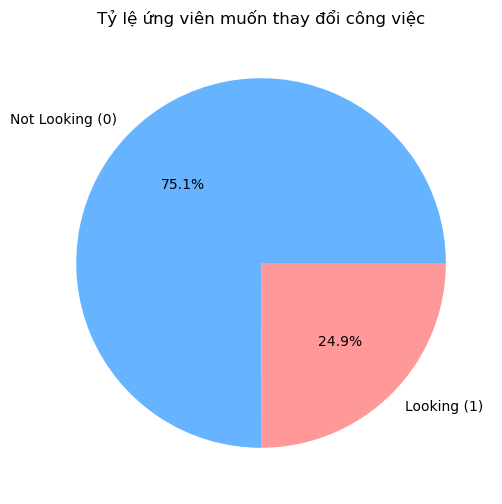

In [7]:
y_train = raw_data['target']
plot_target_distribution(y_train)

Nhận xét: Tỷ lệ ứng viên muốn thay đổi công việc chỉ chiếm khoảng 25%, cho thấy dữ liệu trong tập train bị mất cân bằng nhẹ (tỷ lệ 3:1). Khi đánh giá mô hình, không nên chỉ nhìn vào Accuracy (độ chính xác) mà cần chú trọng vào Precision và Recall để tránh việc mô hình dự đoán toàn bộ là "Không thay đổi" nhưng vẫn có Accuracy cao.  

#### Câu hỏi 2: Trình độ học vấn (Education Level) ảnh hưởng thế nào đến khả năng muốn thay đổi công việc?

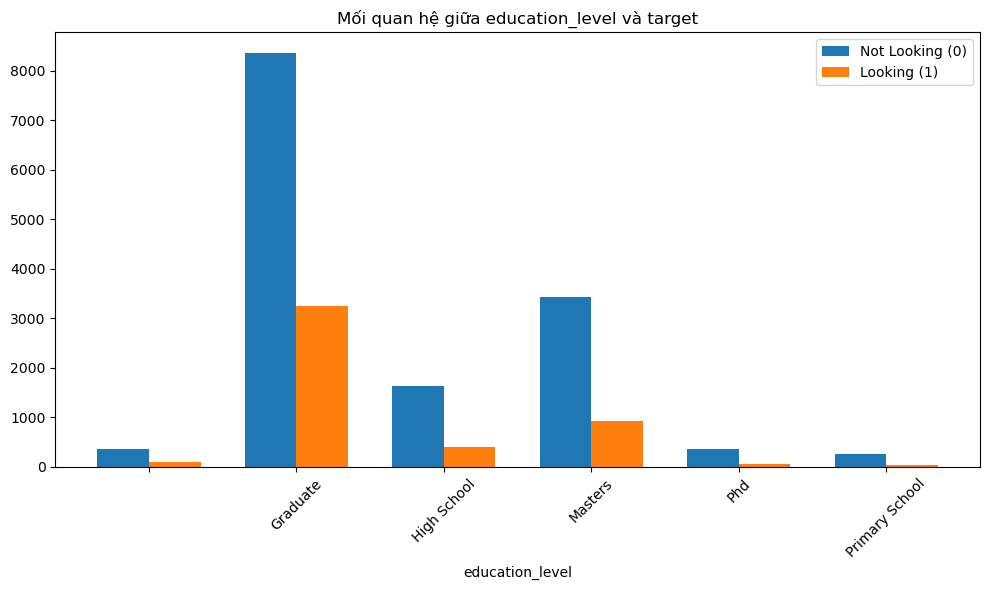

In [8]:
plot_categorical_vs_target(raw_data, 'education_level')

Nhận xét: Trình độ học vấn có sự ảnh hưởng rõ rệt đến khả năng muốn thay đổi công việc. Cụ thể, nhóm "Graduate" chiếm số lượng đông nhất và tỷ lệ muốn thay đổi công việc cũng rất cao so với mặt bằng chung. Tiếp đó là nhóm "Masters" và "PhD" thì có xu hướng ổn định dần hơn. Còn nhóm "High School" mặc dù số lượng khá khiêm tốn (chỉ nhiều hơn "PhD và "Primary School") nhưng tỷ lệ muốn thay đổi công việc cũng không ít. Từ đó ta có thể thấy những người có trình độ cao hơn (PhD và Masters) thường giữ vị trí senior hoặc chuyên gia, ít có xu hướng nhảy việc liên tục so với nhóm mới ra trường hoặc trình độ thấp hơn.

#### Câu hỏi 3: Liệu những ứng viên có kinh nghiệm liên quan (Has relevant experience) thì trung thành hơn hay dễ  thay đổi việc hơn so với người mới (No relevant experience)?

Câu hỏi này sẽ chia ra 2 giả thuyết:
- Giả thuyết A: Người có kinh nghiệm thường ổn định hơn vì họ đã có chỗ đứng trong doanh nghiệp.
- Giả thuyết B: Người có kinh nghiệm được ưu ái hơn trên thị trường, vì vậy họ dễ dàng nhận được offer tốt hơn nên tỷ lệ muốn thay đổi công việc của họ cao hơn nhóm chưa có kinh nghiệm (nhóm này thường cần tích lũy kinh nghiệm nên chưa có nhu cầu thay đổi ngay). 

/home/duyhoang/Downloads/TH LTKHDL /HW02/23120266/HR-Analytics-Job-Change-Of-Data-Scientists/src/visualization.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=rates, palette=colors)


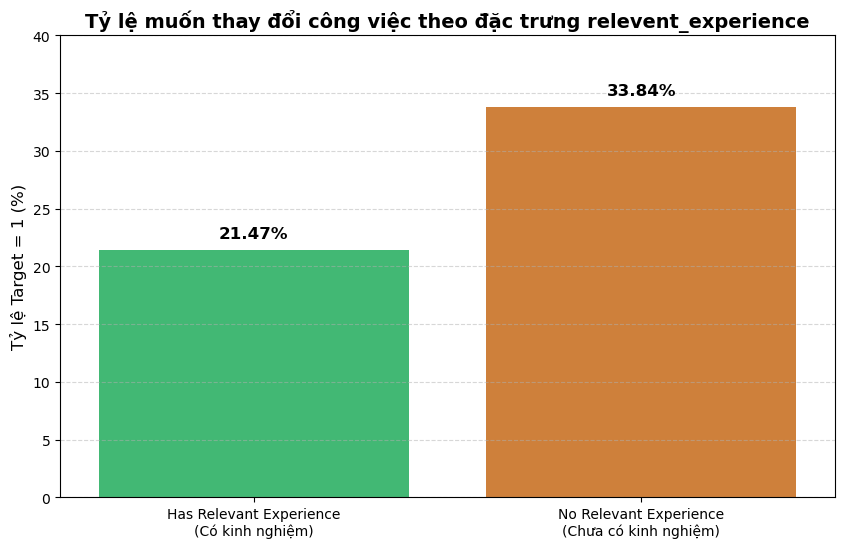

Tỷ lệ của nhóm có kinh nghiệm: 21.47% (Số lượng: 13792)
Tỷ lệ của nhóm chưa có kinh nghiệm: 33.84% (Số lượng: 5366)


In [9]:
target = raw_data['target']
exp_col = raw_data['relevent_experience']

analyze_experience_impact(exp_col, target)

Nhận xét: Dựa trên kết quả thực nghiệm từ bộ dữ liệu này, cho thấy những người đã có kinh nghiệm liên quan thường có xu hướng ổn định hơn. Tỷ lệ muốn nhảy việc của họ thấp hơn đáng kể (21.47% so với 33.84%). Còn đối với nhóm chưa có kinh nghiệm (thường là sinh viên mới ra trường, người chuyển ngành), tỷ lệ thay đổi công việc khá cao, nguyên nhân có thể nằm ở chỗ đây là nhóm đang khao khát tìm kiếm cơ hội gia nhập thị trường hoặc thay đổi môi trường để tích lũy kinh nghiệm. Từ đó có thể rút ra kết luận rằng tuyển người có kinh nghiệm sẽ mang lại sự ổn định lâu dài hơn cho doanh nghiệp, còn ở nhóm chưa có kinh nghiệm cần có các chiến lược giữ chân, khuyến khích ở lại làm việc tiếp thông qua lộ trình phát triển rõ ràng được đề ra cho nhóm này vì đây là nhóm dễ rời đi hơn sau khi họ đã học việc.

#### Câu hỏi 4: Liệu số năm kể từ lần cuối cùng ứng viên thay đổi công việc trước đó có mối liên hệ như thế nào đến khả năng muốn thay đổi công việc hiện tại?

/home/duyhoang/Downloads/TH LTKHDL /HW02/23120266/HR-Analytics-Job-Change-Of-Data-Scientists/src/visualization.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ordered_labels, y=churn_rates, palette="rocket")


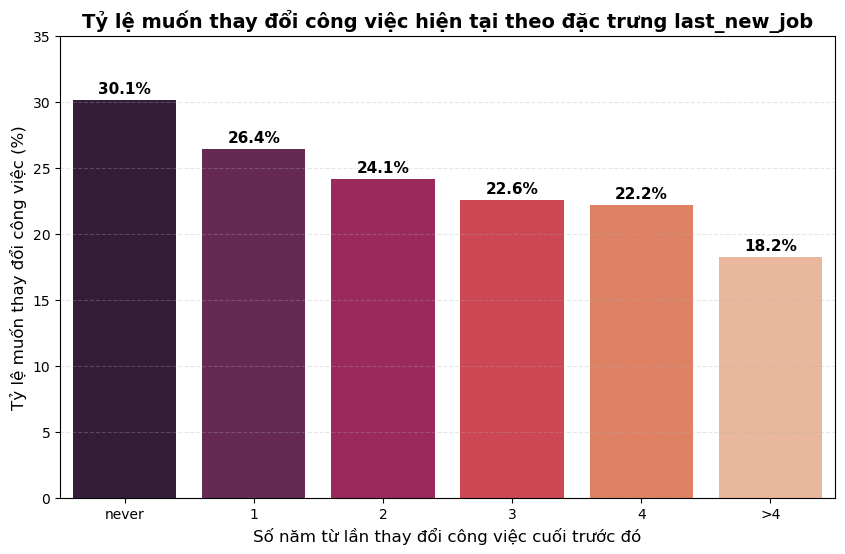

Nhóm never: 30.14% (Số lượng: 2452)
Nhóm 1: 26.43% (Số lượng: 8040)
Nhóm 2: 24.14% (Số lượng: 2900)
Nhóm 3: 22.56% (Số lượng: 1024)
Nhóm 4: 22.16% (Số lượng: 1029)
Nhóm >4: 18.24% (Số lượng: 3290)


In [10]:
last_job = raw_data['last_new_job']
target = raw_data['target']
analyze_last_new_job(last_job, target)

Nhận xét: Tỷ lệ những người muốn thay đổi công việc có xu hướng tỉ lệ nghịch với thời gian kể từ lần cuối cùng ứng viên thay đổi công việc trước đó, cho thấy những người càng có thâm niên trong doanh nghiệp thì càng có xu hướng muốn gắn bó với doanh nghiệp lâu dài hơn. Ở nhóm 1 năm hoặc chưa thay đổi công việc lần nào, nhìn chung có nhu cầu khá cao muốn thay đổi công việc để tiếp tục học hỏi và nâng cấp bản thân hơn ở các doanh nghiệp tương lai. 